In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\acer\Downloads\archive\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df2=df.drop(['area_type','availability','society','balcony'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [3]:
#project starts with data cleaning and it starts with finding NA values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [4]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [5]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [6]:
df3['BHK']= df3['size'].apply(lambda x: int(x.split(' ')[0]))#converting that string to a integer set we use the type csadt int

C:\Users\acer\AppData\Local\Temp\ipykernel_2752\2839395576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']= df3['size'].apply(lambda x: int(x.split(' ')[0]))#converting that string to a integer set we use the type csadt int


In [7]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [8]:
df3[df3.BHK>20].head()

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [9]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [10]:
def is_float(x):   #main target is to deal with the range values in the data to have pass only the single values not the range
    try:
        float(x)
    except:
        return False
    return True
    

In [11]:
df3[~df3['total_sqft'].apply(is_float)].head(30)#(~this denotes a negate value)
#important to make make return false else non of the values will be printed

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [12]:
def convert_sqft_to_num(x):
    try:
        # Case: single float/int value like '1050'
        return float(x)
    except:
        # Case: range like '660 - 780'
        try:
            tokens = x.split('-')
            if len(tokens) == 2:
                return (float(tokens[0]) + float(tokens[1])) / 2
            else:
                return None
        except:
            return None


In [13]:
ee=is_avg('1115 - 1130')
ee

NameError: name 'is_avg' is not defined

In [14]:
df4=df3.copy()
df4['total_sqft_n']=df3['total_sqft'].apply(convert_sqft_to_num)
df4.head(10645)


,location,size,total_sqft,bath,price,BHK,total_sqft_n
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
10706,Anwar Layout,1 BHK,660 - 780,1.0,32.39,1,720.0
10707,Whitefield,3 Bedroom,4800,4.0,600.00,3,4800.0
10708,Yelahanka New Town,2 BHK,1100,2.0,58.00,2,1100.0
10709,Pillanna Gardens,2 BHK,550,1.0,20.00,2,550.0


In [15]:
df5=df4.copy()  #this will be helpful in removing the outliers in the data
df5['price_sqft']= df4['price']*100000/df4['total_sqft_n']
df5.head()

,location,size,total_sqft,bath,price,BHK,total_sqft_n,price_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [16]:
len(df5.location.unique())


1304

In [17]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                            535
Sarjapur  Road                        392
Electronic City                       304
Kanakpura Road                        266
Thanisandra                           236
                                     ... 
poornaprajna layout                     1
pavitra paradise                        1
near Ramanashree California resort      1
mvj engineering college                 1
1Kasavanhalli                           1
Name: location, Length: 1293, dtype: int64

In [18]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                               10
Sadashiva Nagar                       10
BTM 1st Stage                         10
Basapura                              10
Gunjur Palya                          10
                                      ..
poornaprajna layout                    1
pavitra paradise                       1
near Ramanashree California resort     1
mvj engineering college                1
1Kasavanhalli                          1
Name: location, Length: 1052, dtype: int64

In [19]:
df5.location=df.location.apply(lambda x: 'other'if x in location_stats_less_than_10 else x)

In [20]:
len(df5.location.unique())

283

In [21]:
df5.head()

,location,size,total_sqft,bath,price,BHK,total_sqft_n,price_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [22]:
df5[df5.total_sqft_n/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,total_sqft_n,price_sqft
9,other,6 Bedroom,1020,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,600,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,500,3.0,100.0,3,500.0,20000.000000


In [23]:
df5.shape

(13246, 8)

In [24]:
df6= df5[~(df5.total_sqft_n/df5.BHK<300)]
df6.shape
df6

,location,size,total_sqft,bath,price,BHK,total_sqft_n,price_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5,3453.0,6689.834926
13316,other,4 BHK,3600,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4,4689.0,10407.336319


In [25]:
df6['price_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_sqft, dtype: float64

In [26]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf['price_sqft'])
        st = np.std(subdf['price_sqft'])
        reduced_df= subdf[(subdf['price_sqft']>(m-st)) & (subdf['price_sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df7= remove_pps_outliers(df6)
df7.shape#removal of outliers 

(10201, 8)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location)& (df==2)]
    BHK3= df[(df.location==location) &(df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price_per_sqft,marker='+',color='green', label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt,ylabel("Price per square feet")
    plt.title(location)
    plt.legend()



In [29]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]= {
                'mean' : np.mean(bhk_df.price_sqft),
                'std' : np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
                
            }
            
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outliers(df7)
df8.shape

(7324, 8)

In [30]:
df8.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [31]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,total_sqft_n,price_sqft
5292,Neeladri Nagar,10 BHK,4000,12.0,160.0,10,4000.0,4000.000000
8497,other,10 BHK,12000,12.0,525.0,10,12000.0,4375.000000
8583,other,16 BHK,10000,16.0,550.0,16,10000.0,5500.000000
9296,other,11 BHK,6000,12.0,150.0,11,6000.0,2500.000000
9618,other,13 BHK,5425,13.0,275.0,13,5425.0,5069.124424


In [32]:
#after this we will drop some of the features from the dataframe likely size and prices per sqft

Text(0, 0.5, 'Count')

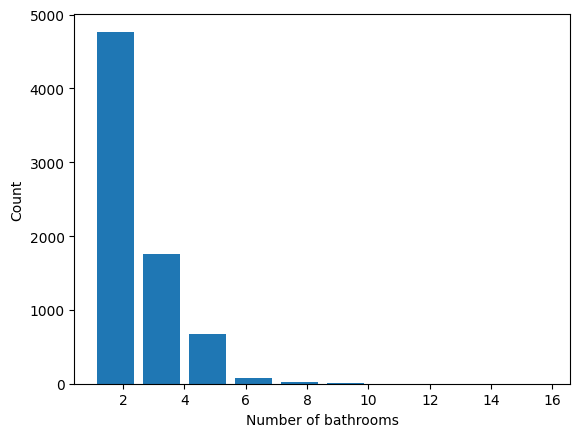

In [33]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [34]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,total_sqft_n,price_sqft
1647,Chikkabanavar,4 Bedroom,2460,7.0,80.0,4,2460.0,3252.032520
5253,Nagasandra,4 Bedroom,7000,8.0,450.0,4,7000.0,6428.571429
6733,Thanisandra,3 BHK,1806,6.0,116.0,3,1806.0,6423.034330
8427,other,6 BHK,11338,9.0,1000.0,6,11338.0,8819.897689


In [35]:
df9=df8[df8.bath<df8.BHK+2]
df9.head()
df9.shape


(7246, 8)

In [36]:
df10=df9.drop(['size','price_sqft'],axis=1)
df10.head()

,location,total_sqft,bath,price,BHK,total_sqft_n
0,Devarabeesana Halli,1672,3.0,150.0,3,1672.0
1,Devarabeesana Halli,1750,3.0,149.0,3,1750.0
2,Devarabeesana Halli,1750,3.0,150.0,3,1750.0
4,Devarachikkanahalli,1250,2.0,40.0,2,1250.0
5,Devarachikkanahalli,1200,2.0,83.0,2,1200.0


In [37]:
dummies= pd.get_dummies(df10.location).astype(int)

In [38]:
df11 =pd.concat([df10,dummies.drop('other',axis=1)],axis='columns')
df11.head()

,location,total_sqft,bath,price,BHK,total_sqft_n,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarabeesana Halli,1672,3.0,150.0,3,1672.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarabeesana Halli,1750,3.0,149.0,3,1750.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarabeesana Halli,1750,3.0,150.0,3,1750.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1250,2.0,40.0,2,1250.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,1200,2.0,83.0,2,1200.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df12= df11.drop('location',axis=1)
df12

,total_sqft,bath,price,BHK,total_sqft_n,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672,3.0,150.0,3,1672.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750,3.0,149.0,3,1750.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750,3.0,150.0,3,1750.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250,2.0,40.0,2,1250.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200,2.0,83.0,2,1200.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10192,1200,2.0,70.0,2,1200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10193,1800,1.0,200.0,1,1800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10196,1353,2.0,110.0,2,1353.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10197,812,1.0,26.0,1,812.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x=df12.drop(['price','total_sqft'],axis='columns')
x.head()

,bath,BHK,total_sqft_n,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,"Whitefield,",Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3.0,3,1672.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3,1750.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,3,1750.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2,1250.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,2,1200.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y=df12.price
y.head()

0    150.0
1    149.0
2    150.0
4     40.0
5     83.0
Name: price, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test  =  train_test_split(x,y,test_size=0.2,random_state=10)

In [44]:
from sklearn.linear_model import LinearRegression
lr_clf =  LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8616926185358119

In [45]:
from sklearn.linear_model import LinearRegression
lr_clf =  LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)
lr_clf.predict

<bound method LinearModel.predict of LinearRegression()>

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.78720273, 0.84158026, 0.77204432, 0.77498417, 0.85768319])

In [47]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


def find_best_model_using_gridsearchcv(X,Y):
    algos= {
        'linear_regression': {
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            
            }
        },
        'lasso': {
            'model': Lasso(),
            'param':{
                'alpha':[1,2],
                'selection':['random','cyclic']
               
                
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores= []
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(x,y)   

KeyError: 'params'

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    X= np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk
    if loc_index >=0:
        X[loc_index] =1

    return lr_clf.predict([X])[0]
    

In [ ]:
x.columns

In [ ]:
np.where(x.columns=='Vishwapriya Layout')[0][0]

In [ ]:
predict_price(' Electronic City',1000,2,2)

In [ ]:
#in some cases the increased no.of bhk or bath has lesser price

In [48]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [49]:
import json
columns={
    'data_columns' : [col.lower() for col in x.columns]3converting all the names  ub the lower case

}
with open("columns.open","w") as f:
    f.write(json.dumps(columns))